In [36]:
#add missing packages to kernel
import sys
!{sys.executable} -m pip install geopandas gpdvega

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 39.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 39.7 MB/s eta 0:00:0000:0100:01


In [40]:
import pandas as pd
import datadotworld as dw
import os
import altair as alt
import datetime
import geopandas as gpd
import gpdvega

ImportError: cannot import name 'InvalidGeometryError' from 'shapely.errors' (/Users/alialvarez/opt/anaconda3/envs/analytics/lib/python3.8/site-packages/shapely/errors.py)

In [10]:
#def
cwd= os.getcwd()
cwd

'/Users/alialvarez/Desktop/STUDIES/github/code_library/us_gun_violence'

In [11]:
#current year
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
current_year = date.strftime("%Y")

# Data Sources

In [44]:
#Population
loc=os.path.join(cwd,'datasets')
df3_population=pd.read_csv(loc+'/'+'population_usafacts.csv')
#saving to local
loc=os.path.join(cwd,'dataframes')
df3_population.to_csv(loc + '/population_usafacts.csv')

df3_population.head(3)

In [13]:
#Mother Jones 
df1_details=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBEbQoWMn_P81DuwmlQC0_jr2sJDzkkC0mvF6WLcM53ZYXi8RMfUlunvP1B5W0jRrJvH-wc-WGjDB1/pub?gid=0&single=true&output=csv')
df1_details.info()
print('-----------------------')
print('\n')
print('\n')
df1_details.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              137 non-null    object
 1   location                          137 non-null    object
 2   date                              137 non-null    object
 3   summary                           137 non-null    object
 4   fatalities                        137 non-null    int64 
 5   injured                           137 non-null    object
 6   total_victims                     137 non-null    object
 7   location.1                        137 non-null    object
 8   age_of_shooter                    137 non-null    object
 9   prior_signs_mental_health_issues  137 non-null    object
 10  mental_health_details             137 non-null    object
 11  weapons_obtained_legally          137 non-null    object
 12  where_obtained        

case                    location      date  \
0  Virginia Walmart shooting        Chesapeake, Virginia  11/22/22   
1        LGBTQ club shooting  Colorado Springs, Colorado  11/19/22   

                                             summary  fatalities injured  \
0  Andre Bing, 31, who worked as a supervisor at ...           6       6   
1  Anderson L. Aldrich, 22, wore body armor and o...           5      25   

  total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
0            12  Workplace             31                                -   
1            30      Other             22                              yes   

   ... weapon_details   race gender  \
0  ...              -  Black      M   
1  ...              -  White      M   

                                             sources  \
0  https://www.washingtonpost.com/dc-md-va/2022/1...   
1  https://coloradosun.com/2022/11/20/club-q-shoo...   

                               mental_health_sources sources_additional_age  \
0                                                  -                      -   
1  https://www.nytimes.com/2022/11/20/us/colorado...                      -   

  latitude longitude  type  year  
0        -         -  Mass  2022  
1        -         -  Mass  2022  

[2 rows x 24 columns]

In [15]:
# The Associated Press/USA TODAY/Northeastern University Mass
loc=os.path.join(cwd,'datasets', 'associatedpress-mass-killings-public')
df2_incidents=pd.read_csv(loc+'/'+'mass_killing_incidents_public.csv')
df2_offenders=pd.read_csv(loc+'/'+'mass_killing_offenders_public.csv')
df2_victims=pd.read_csv(loc+'/'+'mass_killing_victims_public.csv')
df2_weapons=pd.read_csv(loc+'/'+'mass_killing_weapons_public.csv')

print('mass_killing_incidents_public.csv')
print(df2_incidents.head(2))
print('-----------------------')
print('\n')
print('\n')
print('mass_killing_offenders_public.csv')
print(df2_offenders.head(2))
print('-----------------------')
print('\n')
print('\n')
print('mass_killing_victims_public.csv')
print(df2_victims.head(2))
print('-----------------------')
print('\n')
print('\n')
print('mass_killing_weapons_public.csv')
print(df2_weapons.head(2))
print('-----------------------')

mass_killing_incidents_public.csv
   incident_id        date              city state  num_offenders  \
0          543  2022-11-22        Chesapeake    VA              1   
1          541  2022-11-20  Colorado Springs    CO              1   

   num_victims_killed  num_victims_injured  firstcod secondcod    type  \
0                   6                  4.0  Shooting       NaN  Public   
1                   5                 17.0  Shooting       NaN  Public   

  situation_type                    location_type             location  \
0            NaN  Commercial/Retail/Entertainment    Commercial/Retail   
1           Hate  Commercial/Retail/Entertainment  Bar/Club/Restaurant   

   longitude  latitude                                          narrative  
0  -76.25506  36.70788  A gunman, an employee of the Chesapeake Walmar...  
1 -104.75820  38.88104  Five people were killed and 25 injured at an L...  
-----------------------




mass_killing_offenders_public.csv
   incident_id  offend

# Cleaning Data

In [16]:
#colum_names
def clean_column_names(df):
    '''
    function to call on after DataFrame is created to format column names in lowercase 
    without spaces before querying.
    
    :param query: DataFrame
    :returns: DataFrame with columns formatted  
    '''
    import pandas as pd 
    
    columns=df.columns
    new_names=[]
    char_dict={' ':'_',':':''}
    for c in columns:
        new_names.append(c
            .lower()
            .translate(char_dict)
          )
    df.columns=new_names

    return df

dataframes=[df1_details,df2_incidents,df2_victims, df2_offenders, df2_weapons]
for df in dataframes:
    df=clean_column_names(df)

In [17]:
#changing into timestamp type
df1_details.date=pd.to_datetime(df1_details.date)
df2_incidents.date=pd.to_datetime(df2_incidents.date)

In [19]:
# add columns
df2_incidents['tot_victims']=df2_incidents['num_victims_killed']+df2_incidents['num_victims_injured']


In [25]:
#writting to local
loc=os.path.join(cwd, 'dataframes')
df2_incidents.to_csv((loc + '/df2_incidents'))
df1_details.to_csv((loc + '/df1_details'))

## Data per States

In [ ]:
states_abb={"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO","Connecticut": "CT","Delaware": "DE","Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY","Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO","Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM","New York": "NY","North Carolina": "NC","North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI","South Carolina": "SC","South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA","West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY","District of Columbia": "DC","American Samoa": "AS","Guam": "GU","Northern Mariana Islands": "MP","Puerto Rico": "PR","United States Minor Outlying Islands": "UM","U.S. Virgin Islands": "VI"}


In [ ]:
#latest_known_populations
region_population=df3_population.iloc[11:15,:]
state_population=(df3_population.iloc[233:284,:]
                .assign(state=df3_population.Years.str[:-9].str[16:].replace(states_abb)) #isolate state name
                .set_index('state')
                .iloc[:,101:]#remove empty years at the beggining
                .iloc[:,:-1] #remove empty last year
                 )
latest_state_population=state_population.iloc[:,-1].reset_index()
latest_state_population.columns=['state', 'latest_population']

In [34]:
#creating source data by joining all sources by state
import geopandas as gpd

column_names=['state_name', 'drawseq', 'state_fips', 'sub_region', 'state','geometry']        
gdf = gpd.read_file(os.path.join(os.getcwd(),'datasets','states_21basic','states.shp'))
gdf.columns=column_names

df_gun_violence=(df2_incidents
      .loc[:, ['state', 'tot_victims', 'longitude','latitude', 'incident_id']]
      .groupby(df2_incidents.state)
      .agg(
          tot_victims=pd.NamedAgg(column="tot_victims", aggfunc="sum"),
          num_incidents=pd.NamedAgg(column="incident_id", aggfunc="count"),
          latitude=pd.NamedAgg(column="latitude", aggfunc="mean"),
          longitude=pd.NamedAgg(column="longitude", aggfunc="mean"),
      )
      .reset_index()  
     )

latest_state_population
df3_states=pd.merge(left=gdf,right=df_gun_violence, how='right', on='state') 
df3_states=pd.merge(left=latest_state_population,right=source, how='right', on='state')

loc=os.path.join(cwd, 'dataframes')
df2_incidents.to_csv((loc + '/df3_states'))

OSError: Could not find lib c or load any of its variants [].

# Styling

In [618]:
def my_theme():
    markColor = '#30a2da';
    axisColor = '#cbcbcb';
    guideLabelColor = '#999';
    guideTitleColor = '#333';
    backgroundColor = '#f0f0f0';
    blackTitle = '#333';
    
    return {
        'config': {
            'arc': {'fill': markColor},
            'area': {'fill': markColor},
            'axis': {
                'domainColor': axisColor,
                'grid': True,
                'gridColor': axisColor,
                'gridOpacity':0.3,
                'gridWidth': 1,
                'labelColor': guideLabelColor,
                'labelFontSize': 10,
                'titleColor': guideTitleColor,
                'tickColor': axisColor,
                'tickSize': 10,
                'titleFontSize': 14,
                'titlePadding': 10,
                'labelPadding': 4,
              },
            'axisBand': {
                'grid': False,
            },
            'background': backgroundColor,

            'group': {
                'fill': backgroundColor,
              },

            'legend': {
                'labelColor': blackTitle,
                'labelFontSize': 11,
                'padding': 1,
                'symbolSize': 30,
                'symbolType': 'square',
                'titleColor': blackTitle,
                'titleFontSize': 14,
                'titlePadding': 10,
              },

            'line': {
                'stroke': markColor,
                'strokeWidth': 2,
              },

            'path': {'stroke': markColor, 'strokeWidth': 0.5},
            'rect': {'fill': markColor},

              'range': {
                'category': [
                  '#30a2da',
                  '#fc4f30',
                  '#e5ae38',
                  '#6d904f',
                  '#8b8b8b',
                  '#b96db8',
                  '#ff9e27',
                  '#56cc60',
                  '#52d2ca',
                  '#52689e',
                  '#545454',
                  '#9fe4f8',
                ],

                'diverging': ['#cc0020', '#e77866', '#f6e7e1', '#d6e8ed', '#91bfd9', '#1d78b5'],
                'heatmap': ['#d6e8ed', '#cee0e5', '#91bfd9', '#549cc6', '#1d78b5'],
              },

              'point': {
                'filled': True,
                'shape': 'circle',
              },

              'shape': {'stroke': markColor},

              'bar': {
                'binSpacing': 2,
                'fill': markColor,
                'stroke': None
              },

              'title': {
                'anchor': 'start',
                'fontSize': 24,
                'fontWeight': 600,
                'offset': 20,
              },
#             
            'mark': {
                'color': 'black',
                'fill': None
            }
        }
    }
# register the custom theme under a chosen name
alt.themes.register('my_theme', my_theme)
# enable the newly registered theme
alt.themes.enable('my_theme')

ThemeRegistry.enable('my_theme')

# Exploring

## Overall Incidents
Source: The Associated Press/USA TODAY/Northeastern University Mass

In [619]:
title= 'Number shootings per year'
subtitle="2019 holds the record of shooting incidents"

source=df2_incidents

base = alt.Chart(source).properties(width=800)

chart=base.mark_bar().encode(
    x=alt.X('year(date):O', axis=alt.Axis(title='year')),
    y=alt.Y('count(incident_id):Q',axis=alt.Axis(title='count shootings'))
    ).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    }
)
    
bar_inc_per_year=chart
bar_inc_per_year

alt.Chart(...)

In [620]:
var='situation_type'
title= 'Most shootings happen in residences due to interpersonal conflict. '
subtitle='However, indiscriminate shootings are much more deadly'
brush = alt.selection_multi(
    fields=[var], nearest=True, on='click'
)
source=df2_incidents

base = alt.Chart(source).properties(width=800).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    })

chart=base.mark_bar().encode(
    x=alt.X('count(incident_id):Q', axis=alt.Axis(title='num. of shootings')),
    y=alt.Y(var,sort=alt.EncodingSortField(field='incident_id', order='descending', op='count'),axis=alt.Axis(title=var.replace('_', " "))),
    color=alt.condition(brush, 'sum(tot_victims)', alt.value('lightgray')),
    order=alt.Order('count(incident_id)', sort='descending'),
    tooltip=['count(incident_id)']
).add_selection(brush)

    
chart


alt.Chart(...)

In [621]:
var='location_type'
title= ''
subtitle=''

source=df2_incidents

base = alt.Chart(source).properties(width=325).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    })

chart_1=base.mark_bar().encode(
    x=alt.X('count(incident_id):Q', axis=alt.Axis(title='num. of shootings')),
    y=alt.Y(var,sort=alt.EncodingSortField(field='incident_id', order='descending', op='count'),axis=alt.Axis(title=var.replace('_', " "))),
    color=alt.Color('sum(tot_victims)'),
    order=alt.Order('count(incident_id)', sort='descending'),
    tooltip=['count(incident_id)','sum(tot_victims)' ]
).transform_filter(brush)

In [622]:
var='location'
title= ''
subtitle=''

source=df2_incidents[df2_incidents.location_type!='Residence/Other shelter']

base = alt.Chart(source).properties(width=325).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    })

chart_2=base.mark_bar().encode(
    x=alt.X('count(incident_id):Q', axis=alt.Axis(title='num. of shootings')),
    y=alt.Y(var,sort=alt.EncodingSortField(field='incident_id', order='descending', op='count'),axis=alt.Axis(title=var.replace('_', " "))),
    color=alt.Color('sum(tot_victims)'),
    order=alt.Order('count(incident_id)', sort='descending'),
    tooltip=['count(incident_id)','sum(tot_victims)' ]
).transform_filter(brush)

In [623]:
chart & (chart_1 | chart_2)

alt.VConcatChart(...)

In [1311]:
(chart & (chart_1 | chart_2)).save('altair_charts/page_1.html', embed_options={'actions': True})

In [625]:
df2_incidents.head(3)

incident_id       date              city state  num_offenders  \
0          543 2022-11-22        Chesapeake    VA              1   
1          541 2022-11-20  Colorado Springs    CO              1   
2          542 2022-11-20         Hennessey    OK              1   

   num_victims_killed  num_victims_injured  firstcod secondcod    type  \
0                   6                  4.0  Shooting       NaN  Public   
1                   5                 17.0  Shooting       NaN  Public   
2                   4                  1.0  Shooting       NaN   Other   

  situation_type                    location_type             location  \
0            NaN  Commercial/Retail/Entertainment    Commercial/Retail   
1           Hate  Commercial/Retail/Entertainment  Bar/Club/Restaurant   
2            NaN  Commercial/Retail/Entertainment    Commercial/Retail   

   longitude  latitude                                          narrative  \
0  -76.25506  36.70788  A gunman, an employee of the Chesapeake Walmar...   
1 -104.75820  38.88104  Five people were killed and 25 injured at an L...   
2  -98.09125  36.14123  Deputies responding to reports of a hostage si...   

   tot_victims  
0         10.0  
1         22.0  
2          5.0

In [626]:
title= 'Total Victims per year'
subtitle="2019 holds the record of shooting incidents"

source=df2_incidents

base = alt.Chart(source).properties(width=800)

chart=base.mark_bar().encode(
    x=alt.X('year(date):O', axis=alt.Axis(title=None)),
    y=alt.Y('sum(tot_victims):Q',axis=alt.Axis(title='victims'))
    ).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    }
)

    
bar_vic_per_year=chart
bar_vic_per_year

alt.Chart(...)

In [864]:
#comb_inc_and_vict
from altair import datum

title= 'Total Victims vs Number of Incidents per year '
subtitle=["Although significant decrease in incidents tends to follow decrease in victims, the relationship between both variables is not directly proportional as shown in 2017", "and 2019."]

source=df2_incidents

base = alt.Chart(source).properties(width=600).encode(alt.X('year(date):O', axis=alt.Axis(title=None)))

bar=base.mark_bar(opacity=0.8).encode(y=alt.Y('sum(tot_victims):Q',axis=alt.Axis(title='victims', titleColor='#30a2da')))

line=base.mark_line(color='#fc4f30').encode(alt.Y('count(incident_id):Q',axis=alt.Axis(title='count shootings', titleColor='#fc4f30')))


chart_2=alt.layer(bar,line).resolve_scale(y='independent').properties(
    title={
      "text": title, 
      "subtitle": subtitle
    })

chart_2


alt.LayerChart(...)

In [890]:
chart_2.save('altair_charts/chart_2.html', embed_options={'actions': True})

In [630]:
## 2017 increase in victims is caused by Las Vegas shooting with >900 victims
df2_incidents[(df2_incidents.date.dt.year==2017)&(df2_incidents.state=='NV')].loc[:,'narrative']

178    According to the authorities, Stephen Paddock,...
Name: narrative, dtype: object

In [1076]:
#trying to make intearctive
from altair import datum

title= 'Total Victims vs Number of Incidents per year '
subtitle=["Although significant decrease in incidents tends to follow decrease in victims, the relationship between both variables is not directly proportional as shown in 2017", "and 2019."]

brush = alt.selection_single(on='mouseover', nearest=True)
# brush = alt.selection_multi(
#     fields=['year(date)'], nearest=True, on='click'
# )

source=df2_incidents

base = alt.Chart(source).properties(width=600).encode(alt.X('year(date):O', axis=alt.Axis(title=None)))

bar=base.mark_bar(opacity=0.8).encode(
    y=alt.Y('sum(tot_victims):Q',axis=alt.Axis(title='victims', titleColor='#30a2da')),
    tooltip=['year(date):O','sum(tot_victims)','count(incident_id)' ]
)

line=base.mark_line(color='#fc4f30').encode(alt.Y('count(incident_id):Q',axis=alt.Axis(title='count shootings', titleColor='#fc4f30')))


chart_2=alt.layer(bar,line).resolve_scale(y='independent').properties(
    title={
      "text": title, 
      "subtitle": subtitle
    }).add_selection(brush)

chart_2

alt.LayerChart(...)

## Testing Altair capabilities
##Code Source https://www.youtube.com/watch?v=ON5GouFE3sc

In [717]:
world= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head(3)

pop_est continent       name iso_a3  gdp_md_est  \
0    920938   Oceania       Fiji    FJI      8374.0   
1  53950935    Africa   Tanzania    TZA    150600.0   
2    603253    Africa  W. Sahara    ESH       906.5   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...

In [867]:
world= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

brush= alt.selection_single(encodings=['y'],on='mouseover', empty='none')
color=alt.Color('pop_est', scale=alt.Scale(type='pow', exponent=0.4))

alt.hconcat(
    alt.Chart().mark_bar().encode(
        x=alt.X('pop_est', scale=alt.Scale(nice=False)),
        y=alt.Y('name', sort=alt.EncodingSortField(field='pop_est', op='sum', order='descending')),
        tooltip=['name', 'pop_est','gdp_md_est' ],
        color=alt.condition(brush, alt.value('lightgray'), color)
    ).add_selection(
        brush
    ).properties(
        width=200,
        height=450
),
    alt.Chart().mark_geoshape().project().encode(
        color=alt.condition(
        brush,
            alt.value('lightgray'),
            color,
        ),
        tooltip=['name', 'pop_est','gdp_md_est' ],
    ).properties(
        width=300,
        height=450,
        title='North America population'
    ),
    data=world[world.continent=='North America']
)

/Users/alialvarez/opt/anaconda3/envs/analytics/lib/python3.8/site-packages/altair/utils/data.py:226: AltairDeprecationWarning: alt.pipe() is deprecated, and will be removed in a future release. Use toolz.curried.pipe() instead.
  warnings.warn(
/Users/alialvarez/opt/anaconda3/envs/analytics/lib/python3.8/site-packages/gpdvega/geodata.py:38: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  data.drop(


alt.HConcatChart(...)

## Map Incidents Per State

In [1077]:
from vega_datasets import data
states = alt.topo_feature(data.us_10m.url, feature='states')
# brush = alt.selection(type='single', on='click', nearest=True)

data=(df2_incidents
      .loc[:, ['state', 'tot_victims', 'longitude','latitude']]
      .groupby(df2_incidents.state)
      .agg(
          tot_victims=pd.NamedAgg(column="tot_victims", aggfunc="sum"),
          latitude=pd.NamedAgg(column="latitude", aggfunc="mean"),
          longitude=pd.NamedAgg(column="longitude", aggfunc="mean"),
      )
      .reset_index()  
     )
data

# US states background
background = alt.Chart(states).mark_geoshape(
        fill='lightgray',
        stroke='white'
    ).properties(
        width=600,
        height=400
    ).project('albersUsa')

# victims positions on background
points = alt.Chart(data).mark_circle().encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        size=alt.Size('sum(tot_victims)',title='Number of Victims'),
        color=alt.value('steelblue'),
        tooltip=['state:N','tot_victims:Q']
    ).properties(
        title='Number of Victims per State'
    )

chart_3=(background + points).transform_filter(
        brush
    )


In [1078]:
chart_2 & chart_3

/Users/alialvarez/opt/anaconda3/envs/analytics/lib/python3.8/site-packages/altair/utils/data.py:226: AltairDeprecationWarning: alt.pipe() is deprecated, and will be removed in a future release. Use toolz.curried.pipe() instead.
  warnings.warn(


alt.VConcatChart(...)

## Victims vs Population graphs

In [633]:
states_abb={"Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO","Connecticut": "CT","Delaware": "DE","Florida": "FL","Georgia": "GA","Hawaii": "HI","Idaho": "ID","Illinois": "IL","Indiana": "IN","Iowa": "IA","Kansas": "KS","Kentucky": "KY","Louisiana": "LA","Maine": "ME","Maryland": "MD","Massachusetts": "MA","Michigan": "MI","Minnesota": "MN","Mississippi": "MS","Missouri": "MO","Montana": "MT","Nebraska": "NE","Nevada": "NV","New Hampshire": "NH","New Jersey": "NJ","New Mexico": "NM","New York": "NY","North Carolina": "NC","North Dakota": "ND","Ohio": "OH","Oklahoma": "OK","Oregon": "OR","Pennsylvania": "PA","Rhode Island": "RI","South Carolina": "SC","South Dakota": "SD","Tennessee": "TN","Texas": "TX","Utah": "UT","Vermont": "VT","Virginia": "VA","Washington": "WA","West Virginia": "WV","Wisconsin": "WI","Wyoming": "WY","District of Columbia": "DC","American Samoa": "AS","Guam": "GU","Northern Mariana Islands": "MP","Puerto Rico": "PR","United States Minor Outlying Islands": "UM","U.S. Virgin Islands": "VI"}

In [925]:
#latest_known_populations
region_population=df3_population.iloc[11:15,:]
state_population=(df3_population.iloc[233:284,:]
                .assign(state=df3_population.Years.str[:-9].str[16:].replace(states_abb)) #isolate state name
                .set_index('state')
                .iloc[:,101:]#remove empty years at the beggining
                .iloc[:,:-1] #remove empty last year
                 )
latest_state_population=state_population.iloc[:,-1].reset_index()

latest_state_population.columns=['state', 'latest_population']

In [1016]:
#creating source data by joining all sources by state
import geopandas as gpd

column_names=['state_name', 'drawseq', 'state_fips', 'sub_region', 'state','geometry']        
gdf = gpd.read_file(os.path.join(os.getcwd(),'datasets','states_21basic','states.shp'))
gdf.columns=column_names

df_gun_violence=(df2_incidents
      .loc[:, ['state', 'tot_victims', 'longitude','latitude', 'incident_id']]
      .groupby(df2_incidents.state)
      .agg(
          tot_victims=pd.NamedAgg(column="tot_victims", aggfunc="sum"),
          num_incidents=pd.NamedAgg(column="incident_id", aggfunc="count"),
          latitude=pd.NamedAgg(column="latitude", aggfunc="mean"),
          longitude=pd.NamedAgg(column="longitude", aggfunc="mean"),
      )
      .reset_index()  
     )

latest_state_population
source=pd.merge(left=gdf,right=df_gun_violence, how='right', on='state') 
source=pd.merge(left=latest_state_population,right=source, how='right', on='state')

print('printing example:')
source[source.state=='CA']

printing example:


state  latest_population  state_name  drawseq state_fips sub_region  \
4    CA          7788195.0  California       25         06    Pacific   

                                            geometry  tot_victims  \
4  MULTIPOLYGON (((-121.66522 38.16929, -121.7823...        422.0   

   num_incidents   latitude   longitude  
4             57  35.593483 -119.449117

In [905]:
#sum victims last decade
last_year=df2_incidents.date.dt.year.max()
state_victims_last_decade=(df2_incidents
      [df2_incidents.date.dt.year>=last_year-10]
      .groupby(df2_incidents.state)
      .agg(
          tot_victims=pd.NamedAgg(column="tot_victims", aggfunc="sum")
       )
      .sort_values(by='tot_victims', ascending=False)
)
state_victims_last_decade.head(3)

tot_victims
state             
NV           931.0
TX           364.0
CA           308.0

In [907]:
state='CA'
state_population=source[source.state==state]['latest_population']
state_victims=source[source.state==state]['tot_victims']

data=pd.DataFrame([dict(id=i) for i in range(1, num_people+1)])
person = (
    "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 "
    "-0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 "
    "0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 "
    "0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 "
    "0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 "
    "-0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 "
    "-0.6 -0.4 -0.6z"
)

population= alt.Chart(data).transform_calculate(
        row="ceil(datum.id/10)"
    ).transform_calculate(
        col="datum.id - datum.row*10"
    ).mark_point(
        filled=False,
        size=40
    ).encode(
        x=alt.X("col:O", axis=None),
        y=alt.Y("row:O", axis=None),
        shape=alt.ShapeValue(person)
    ).properties(
        width=300,
        height=300
    ).configure_view(
        strokeWidth=0
)

population 

/Users/alialvarez/opt/anaconda3/envs/analytics/lib/python3.8/site-packages/altair/utils/data.py:226: AltairDeprecationWarning: alt.pipe() is deprecated, and will be removed in a future release. Use toolz.curried.pipe() instead.
  warnings.warn(


alt.Chart(...)

In [1030]:
from collections import ChainMap
data=source
dict_sub_region=(
    data.loc[:,['state','sub_region']]
    .set_index('state')
    .set_axis(['sub_region'], axis = 1)#renaming columns
    .to_dict()
)
dict_sub_region
dict_sub_region = dict(ChainMap(*dict_sub_region.values()))#removes top level of dictionary
print(dict_sub_region)

{'AK': 'Pacific', 'AL': 'East South Central', 'AR': 'West South Central', 'AZ': 'Mountain', 'CA': 'Pacific', 'CO': 'Mountain', 'CT': 'New England', 'DC': 'South Atlantic', 'DE': 'South Atlantic', 'FL': 'South Atlantic', 'GA': 'South Atlantic', 'IA': 'West North Central', 'ID': 'Mountain', 'IL': 'East North Central', 'IN': 'East North Central', 'KS': 'West North Central', 'KY': 'East South Central', 'LA': 'West South Central', 'MA': 'New England', 'MD': 'South Atlantic', 'ME': 'New England', 'MI': 'East North Central', 'MN': 'West North Central', 'MO': 'West North Central', 'MS': 'East South Central', 'MT': 'Mountain', 'NC': 'South Atlantic', 'ND': 'West North Central', 'NE': 'West North Central', 'NJ': 'Middle Atlantic', 'NM': 'Mountain', 'NV': 'Mountain', 'NY': 'Middle Atlantic', 'OH': 'East North Central', 'OK': 'West South Central', 'OR': 'Pacific', 'PA': 'Middle Atlantic', 'SC': 'South Atlantic', 'SD': 'West North Central', 'TN': 'East South Central', 'TX': 'West South Central', 'U

In [1052]:
def catchstate(df, var_name: str) -> 'pd.DataFrame':
    """
    Helper function that captures intermediate Dataframes mid-chain.
    In the global namespace, make a new variable called var_name and set it to dataframe
    """
    globals()[var_name] = df
    return df


In [1313]:
title= 'Yearly Victims Per Region'
subtitle=["There is an increase in the number of victims in most sub_regions of th country","*outlier Las Vegas Shooting in 2017 was removed to appreciate other sub regions*"]

brush = alt.selection_single(nearest=True, on='mouseover')

data=(df2_incidents
      .assign(year=df2_incidents.date.dt.year, month=df2_incidents.date.dt.month)
      .assign(sub_region=df2_incidents.state.map(dict_sub_region))
      .pipe(catchstate, var_name="df2")
      [(df2.sub_region!='Mountain')|(df2.year!=2017)]#filtering outlier of las vegas shooting
      .groupby(by=['year','sub_region'])
      .agg(
          tot_victims=pd.NamedAgg(column="tot_victims", aggfunc="sum"),
          num_incidents=pd.NamedAgg(column="incident_id", aggfunc="count")
      ).reset_index()
     )
data

base = alt.Chart(data).properties(width=800).encode(alt.X('year:O', axis=alt.Axis(title=None)))

lines=base.mark_line().encode(
    alt.Y('tot_victims:Q',axis=alt.Axis(title='Victims')),
    color=alt.Color('sub_region:N', title='Sub Regions'),
    tooltip=['year:Q','sub_region:N','num_incidents:Q' ]
).properties(
    title={
      "text": title, 
      "subtitle": subtitle
    }
).add_selection(brush
)

chart_5=lines

In [1315]:
chart_4=(chart_2 & chart_5 &chart_3)
chart_4.save('altair_charts/page_2.html', embed_options={'actions': True})
chart_4

alt.VConcatChart(...)

In [1080]:
title= ''
subtitle=''

source=df2_incidents


columns=sorted(source.date.dt.year.unique())


a = alt.Chart(source).mark_bar().encode(
    x=alt.X('month(date):O', axis=alt.Axis(title=None)),
    y=alt.Y('count(incident_id):Q',axis=alt.Axis(title='Num. of Shootings')),
    color='situation_type', 
    tooltip=['year(date)', 'count(incident_id)', 'situation_type'],
    order=alt.Order('situation_type', sort='descending')
).properties(width=800)

explore=a
explore

alt.Chart(...)

## In depth view 
Source: Mother Jones data

In [1319]:
df1_details.info()
df1_details.head(3)
df1_details.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   case                              137 non-null    object        
 1   location                          137 non-null    object        
 2   date                              137 non-null    datetime64[ns]
 3   summary                           137 non-null    object        
 4   fatalities                        137 non-null    int64         
 5   injured                           137 non-null    object        
 6   total_victims                     137 non-null    object        
 7   location.1                        137 non-null    object        
 8   age_of_shooter                    137 non-null    object        
 9   prior_signs_mental_health_issues  137 non-null    object        
 10  mental_health_details             137 non-null    

array(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources',
       'mental_health_sources', 'sources_additional_age', 'latitude',
       'longitude', 'type', 'year'], dtype=object)

In [1320]:
cols=['case', 'geo_location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location', 'age',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'sources',
       'mental_health_sources', 'sources_additional_age', 'latitude',
       'longitude', 'type', 'year', 'month']

data=(df1_details
    .assign(year=df2_incidents.date.dt.year, month=df2_incidents.date.dt.month)
    .set_axis(cols, axis = 1)
    .pipe(catchstate, var_name="df2")
)
data.head(2)

case                geo_location       date  \
0  Virginia Walmart shooting        Chesapeake, Virginia 2022-11-22   
1        LGBTQ club shooting  Colorado Springs, Colorado 2022-11-19   

                                             summary  fatalities injured  \
0  Andre Bing, 31, who worked as a supervisor at ...           6       6   
1  Anderson L. Aldrich, 22, wore body armor and o...           5      25   

  total_victims   location age prior_signs_mental_health_issues  ...   race  \
0            12  Workplace  31                                -  ...  Black   
1            30      Other  22                              yes  ...  White   

  gender                                            sources  \
0      M  https://www.washingtonpost.com/dc-md-va/2022/1...   
1      M  https://coloradosun.com/2022/11/20/club-q-shoo...   

                               mental_health_sources sources_additional_age  \
0                                                  -                      -   
1  https://www.nytimes.com/2022/11/20/us/colorado...                      -   

  latitude longitude  type  year month  
0        -         -  Mass  2022    11  
1        -         -  Mass  2022    11  

[2 rows x 25 columns]

### Shooter Profile

In [1325]:
# from vega_datasets import data
# source = data.population.url
source=(data
#         .dropna(subset=['gender'])
       )

color_scale = alt.Scale(domain=['M', 'F'],
                        range=['#1f77b4', '#e377c2'])
base = alt.Chart(source).transform_calculate(
    gender=alt.expr.if_(alt.datum.gender == "M", 'M', 'F')
).properties(
    width=250
)

left = base.transform_filter(
    alt.datum.gender == 'F'
).encode(
    y=alt.Y('binned_age:O', axis=None),
    x=alt.X('count(case):Q',
            title='age (binned)',
            sort=alt.SortOrder('descending')),
    color=alt.Color('gender:N', scale=color_scale, legend=None),
    tooltip=['count(case)']
).mark_bar().transform_bin(
    'binned_age', field='age'
).properties(title='Female')

middle = base.encode(
    y=alt.Y('binned_age:O', axis=None),
    text=alt.Text('binned_age:Q'),
).mark_text().transform_bin(
    'binned_age', field='age'
).properties(width=20)

right = base.transform_filter(
    alt.datum.gender == 'M'
).encode(
    y=alt.Y('binned_age:O', axis=None),
    x=alt.X('count(case):Q', title='age (binned)'),
    color=alt.Color('gender:N', scale=color_scale, legend=None),
    tooltip=['count(case)']
).mark_bar().transform_bin(
    'binned_age', field='age'
).properties(title='Male')

chart_2_1=alt.concat(left, middle, right, spacing=5)
chart_2_1

alt.ConcatChart(...)

In [1326]:
var='race'
title= "Race"
subtitle=''
dict_race={'white':'White', "-":'Unknown', 'unclear':'Unknown', 'black':'Black', 'White ':'White'}


# brush = alt.selection_single(nearest=True, on='mouseover')

source=(data
        .assign(race=data.race.replace(dict_race))
)

base = alt.Chart(source).properties(width=300).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    })

chart=base.mark_bar().encode(
    x=alt.X('count(case):Q', axis=alt.Axis(title='num. of shootings')),
    y=alt.Y(var,sort=alt.EncodingSortField(field='incident_id', order='descending', op='count'),axis=alt.Axis(title=var.replace('_', " "))),
    order=alt.Order('count(case)', sort='descending'),
    tooltip=['count(case)']
)

    
chart_2_2=chart
chart_2_2

alt.Chart(...)

In [1331]:
var='prior_signs_mental_health_issues'
title= ['Prior Signs of', 'Mental Health']
subtitle=''
dict_values={'yes':'Yes', "-":'Unknown', 'unclear':'Unknown', 'Unclear':'Unknown','Unclear ':'Unknown','TBD':'Unknown', 'no':'No'}

# brush = alt.selection_single(nearest=True, on='mouseover')

source=(data
        .assign(prior_signs_mental_health_issues=data.prior_signs_mental_health_issues.replace(dict_values))
        .pipe(catchstate, var_name="df2")
        [(df2.prior_signs_mental_health_issues!='Unknown')]
        .groupby(by=['prior_signs_mental_health_issues'])
        .agg(
          num_incidents=pd.NamedAgg(column="case", aggfunc="count")
        ).reset_index()
)
source

base = alt.Chart(source).properties(width=200).properties(
    title={
      "text": title, 
      "subtitle": subtitle
    })

chart=base.mark_bar().encode(
    x=alt.X('num_incidents:Q', axis=alt.Axis(title='num. of shootings')),
    y=alt.Y(var,sort=alt.EncodingSortField(field='num_incidents', order='descending', op='sum'),axis=alt.Axis(title='')),
    order=alt.Order('num_incidents', sort='descending'),
    tooltip=['num_incidents',var]
)

# chart=base.mark_arc().encode(
#     theta=alt.Theta(field='num_incidents', type='quantitative'),
#     color=alt.Color(field=var, type="nominal", title=var.replace('_', " ")),
# )
    
chart_2_3=chart
chart_2_3

/Users/alialvarez/opt/anaconda3/envs/analytics/lib/python3.8/site-packages/altair/utils/data.py:226: AltairDeprecationWarning: alt.pipe() is deprecated, and will be removed in a future release. Use toolz.curried.pipe() instead.
  warnings.warn(


alt.Chart(...)

In [1332]:
page_3=chart_2_1 & (chart_2_2 | chart_2_3)
page_3.save('altair_charts/page_3.html', embed_options={'actions': True})
page_3

alt.VConcatChart(...)

In [1279]:
#define original data
col='mental_health_details'
dirty = (
    data.copy()
    [col]
    .reset_index()
    .set_axis(['index','desc'], axis=1)
    .drop('index', axis=1)
    .pipe(catchstate, var_name="df2")
    [(df2.desc!='-')]
    .dropna()
)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alialvarez/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alialvarez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alialvarez/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alialvarez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


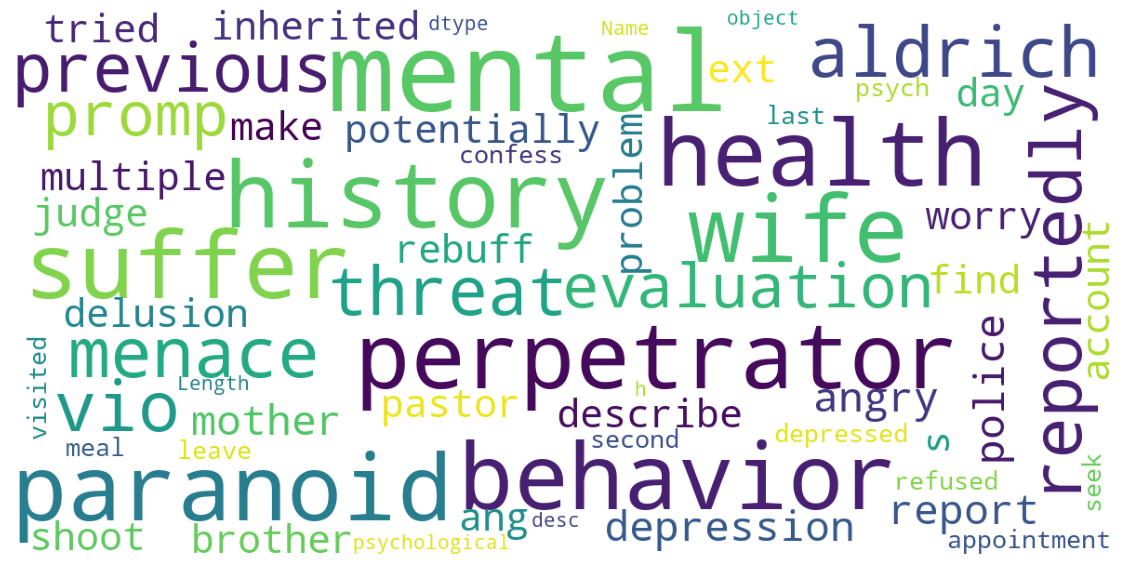

In [1249]:
## NPL to Desc:  Wordcloud of all data
# libraries for NLP
import nltk
nltk.download('omw-1.4')
from nltk import FreqDist
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer


# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
# clean text data

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

#define original data
dirty = dirty

##clean data
content_clean=dirty.desc.apply(lambda x: clean_text(x))

##graphic wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))
 
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
 
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(content_clean)

In [1275]:
var='weapons_obtained_legally'
title= ''
subtitle=''
dict_values={'yes':'Yes', "-":'Unknown', 'unclear':'Unknown', 'Unclear':'Unknown','Unclear ':'Unknown','TBD':'Unknown', 'no':'No'}


source=(data
        .assign(weapons_obtained_legally=data[var].replace(dict_values))
        .pipe(catchstate, var_name="df2")
        [(df2[var]=='Yes')|(df2[var]=='No')]
        .groupby(by=[var])
        .agg(
          num_incidents=pd.NamedAgg(column="case", aggfunc="count")
        ).reset_index()
)

# print(source)

base = alt.Chart(source).properties(width=200).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    })

chart=base.mark_arc().encode(
    theta=alt.Theta(field='num_incidents', type='quantitative'),
    color=alt.Color(field=var, type="nominal", title=var.replace('_', " ")),
)
    
chart

/Users/alialvarez/opt/anaconda3/envs/analytics/lib/python3.8/site-packages/altair/utils/data.py:226: AltairDeprecationWarning: alt.pipe() is deprecated, and will be removed in a future release. Use toolz.curried.pipe() instead.
  warnings.warn(


alt.Chart(...)

In [1276]:
var='weapon_type'
title= ''
subtitle=''
dict_race={'white':'White', "-":'Unknown', 'unclear':'Unknown', 'black':'Black', 'White ':'White'}


# brush = alt.selection_single(nearest=True, on='mouseover')

source=(data
        .assign(race=data.race.replace(dict_race))
)

base = alt.Chart(source).properties(width=800).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    })

chart=base.mark_bar().encode(
    x=alt.X('count(case):Q', axis=alt.Axis(title='num. of shootings')),
    y=alt.Y(var,sort=alt.EncodingSortField(field='incident_id', order='descending', op='count'),axis=alt.Axis(title=var.replace('_', " "))),
    order=alt.Order('count(case)', sort='descending'),
    tooltip=['count(case)']
)

    
chart_6=chart
chart_6

alt.Chart(...)

In [1166]:
data.head(2)

case                geo_location       date  \
0  Virginia Walmart shooting        Chesapeake, Virginia 2022-11-22   
1        LGBTQ club shooting  Colorado Springs, Colorado 2022-11-19   

                                             summary  fatalities injured  \
0  Andre Bing, 31, who worked as a supervisor at ...           6       6   
1  Anderson L. Aldrich, 22, wore body armor and o...           5      25   

  total_victims   location age prior_signs_mental_health_issues  ...   race  \
0            12  Workplace  31                                -  ...  Black   
1            30      Other  22                              yes  ...  White   

  gender                                            sources  \
0      M  https://www.washingtonpost.com/dc-md-va/2022/1...   
1      M  https://coloradosun.com/2022/11/20/club-q-shoo...   

                               mental_health_sources sources_additional_age  \
0                                                  -                      -   
1  https://www.nytimes.com/2022/11/20/us/colorado...                      -   

  latitude longitude  type  year month  
0        -         -  Mass  2022    11  
1        -         -  Mass  2022    11  

[2 rows x 25 columns]

In [1273]:
var='weapons_obtained_legally'
title= ''
subtitle=''
dict_values={' Yes':'Yes','Yes ':'Yes','yes':'Yes', "-":'Unknown', 'unclear':'Unknown', 'Unclear':'Unknown','Unclear ':'Unknown','TBD':'Unknown', 'no':'No'}


# brush = alt.selection_single(nearest=True, on='mouseover')

source=(data
        .assign(weapons_obtained_legally=data[var].replace(dict_values))
        .pipe(catchstate, var_name="df2")
        [(df2[var]=='Yes')|(df2[var]=='No')]
        .groupby(by=[var])
        .agg(
          num_incidents=pd.NamedAgg(column="case", aggfunc="count")
        ).reset_index()
)
source
base = alt.Chart(source).properties(width=200).properties(
    title={
      "text": [title], 
      "subtitle": [subtitle]
    })

# # chart=base.mark_bar().encode(
# #     x=alt.X('count(case):Q', axis=alt.Axis(title='num. of shootings')),
# #     y=alt.Y(var,sort=alt.EncodingSortField(field='incident_id', order='descending', op='count'),axis=alt.Axis(title=var.replace('_', " "))),
# #     order=alt.Order('count(case)', sort='descending'),
# #     tooltip=['count(case)','weapons_obtained_legally']
# # )

chart=base.mark_arc().encode(
    theta=alt.Theta(field='count(case)', type='quantitative'),
    color=alt.Color(field=var, type="nominal", title=var.replace('_', " ")),
)
    
chart

/Users/alialvarez/opt/anaconda3/envs/analytics/lib/python3.8/site-packages/altair/utils/data.py:226: AltairDeprecationWarning: alt.pipe() is deprecated, and will be removed in a future release. Use toolz.curried.pipe() instead.
  warnings.warn(


alt.Chart(...)